<a href="https://colab.research.google.com/github/juliojesus15/UMAP-training/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Utils**

In [112]:
import json
import pandas as pd
import numpy as np
import pickle

def export_to_json(filename, data):
  with open(filename, "w") as archivo:
    json.dump(data, archivo)
  output = json.dumps(data)

def read_json(filename):
  with open(filename, "r") as archivo:
    datos_json = json.load(archivo)
  return datos_json

def save_model(filename, model):
  with open(filename, 'wb') as file:
    pickle.dump(model, file)

def load_model(filename):
  with open(filename, 'rb') as file:
    model = pickle.load(file)
  return model

# **Data**

In [13]:
students = pd.read_csv("drive/MyDrive/UCSP/Colab/UMAP - Training/Dataset/students.csv")
students.head(3)

,student_id,enrollment,name,lastname,gender,career,current_semester,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,dropout
0,54890c33-823a-48f6-b5a7-0b50bfbef04e,2010-01,Jonas,Ortiz,female,Civil,3,11,6,6,9,12,8,6,10,12,5,True
1,83859bfc-48b2-45c6-9f06-1b714e06d00a,2010-01,Claudie,West,male,Computer Science,9,14,14,19,13,18,18,16,19,16,14,False
2,e69a025d-aff1-4b9b-8529-2c25fb85e53c,2010-01,Bobby,Dickinson,female,Civil,2,3,12,5,6,4,12,9,11,6,9,True


In [15]:
students['dropout'] = students['dropout'].astype(int)

students.head(3)

,student_id,enrollment,name,lastname,gender,career,current_semester,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,dropout
0,54890c33-823a-48f6-b5a7-0b50bfbef04e,2010-01,Jonas,Ortiz,female,Civil,3,11,6,6,9,12,8,6,10,12,5,1
1,83859bfc-48b2-45c6-9f06-1b714e06d00a,2010-01,Claudie,West,male,Computer Science,9,14,14,19,13,18,18,16,19,16,14,0
2,e69a025d-aff1-4b9b-8529-2c25fb85e53c,2010-01,Bobby,Dickinson,female,Civil,2,3,12,5,6,4,12,9,11,6,9,1


In [18]:
from sklearn.preprocessing import StandardScaler

students_data = students[ [ "grade1", "grade2", "grade3", "grade4", "grade5", "grade6", "grade7", "grade8", "grade9", "grade10", "dropout", ] ].values
scaled_students_data = StandardScaler().fit_transform(students_data)

#scaled_students_data

# **Model**

In [58]:
import umap
import matplotlib.pyplot as plt


In [23]:
embedding = umap.UMAP(n_neighbors=5, random_state=42).fit(scaled_students_data)


In [ ]:
# Obtener las proyecciones
scaled_test_data = np.random.randn(3, 11)

#embeddings = embedding.transform(scaled_students_data)
embeddings = embedding.transform(scaled_students_data)

dropout_values = students_data[:, -1]
colors = ['red', 'blue']
#dropout_values
#plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=dropout_values,  cmap="coolwarm", s=100)

# Agregar una leyenda
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='No Dropout = 0', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Dropout = 1', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements)

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Proyecciones UMAP')
plt.show()

In [ ]:
#N_NEIGHBORS = [2, 10, 20, 50, 100, 200]
N_NEIGHBORS = [2, 20, 200]
#MIN_DIST = [0.1, 0.25, 0.5, 0.99]
MIN_DIST = [0.1, 0.5, 0.99]
#METRICS = ['euclidean', 'manhattan', 'chebyshev', 'minkowsk']
METRICS = ['euclidean', 'manhattan']
N_COMPONENTS = 2
PATH = "drive/MyDrive/UCSP/Colab/UMAP - Training/Train/"

for metric in METRICS:
  for n_neighbor in N_NEIGHBORS:
    for min_dist in MIN_DIST:

      model = umap.UMAP(
                n_neighbors=n_neighbor,
                min_dist=min_dist,
                n_components=N_COMPONENTS,
                metric=metric,
                random_state=42
              ).fit(scaled_students_data)

      filename = PATH + str(n_neighbor) + '_' + str(min_dist).replace('.','_') + '_' + str(metric)
      #print(metric, ' - ',  n_neighbor, ' - ', min)
      save_model(filename, model)
      print(filename)



In [95]:
with open('umap_model.pkl', 'rb') as file:
    umap_pre_trained = pickle.load(file)

In [102]:

embeddings = umap_pre_trained.transform(scaled_students_data)

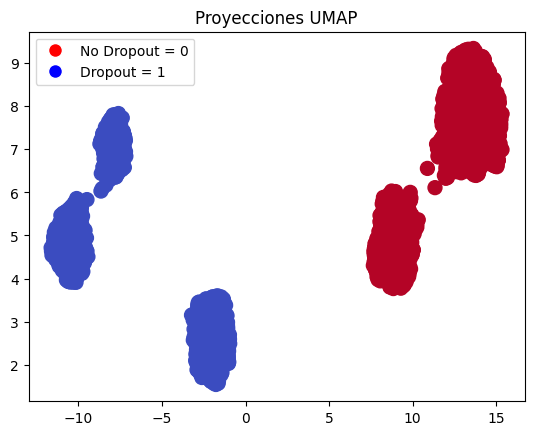

In [103]:
# probando con datos de estudiantes usando el modelo entrenado
dropout_values = students_data[:, -1]

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=dropout_values,  cmap="coolwarm", s=100)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='No Dropout = 0', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Dropout = 1', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements)

plt.title('Proyecciones UMAP')
plt.show()